## Import libraries and data

In [1]:
#import libraries
import pandas as pd
import pyarrow
import glob
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics


In [2]:
#display only 2 decimal numbers for all float data for all notebook
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#display maximum 500 columns for all notebook
pd.set_option('display.max_columns', None)

In [3]:
#import data
pokemon_data = pd.read_csv("C:/Users/Anaïs WERNLE/Desktop/Pokemon_data.csv")

In [4]:
pokemon_data.head(5)

,pokedex_number,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega
0,1,Bulbasaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.70,6.90,Grass,Poison,318,45,49,49,65,65,45,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,"5,140",70.00,0,0,0
1,2,Ivysaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.00,13.00,Grass,Poison,405,60,62,63,80,80,60,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,"5,140",70.00,0,0,0
2,3,Venusaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.00,100.00,Grass,Poison,525,80,82,83,100,100,80,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,"5,140",70.00,0,0,0
3,3,Mega Venusaur,1,Seed Pokemon,['Thick Fat'],2.40,155.50,Grass,Poison,625,80,100,123,122,120,80,1.00,1.00,1.00,0.50,0.50,0.50,1.00,2.00,1.00,0.25,1.00,1.00,1.00,1.00,2.00,1.00,1.00,0.50,45,"5,140",70.00,0,0,1
4,4,Charmander,1,Lizard Pokemon,"['Blaze', 'Solar Power']",0.60,8.50,Fire,None,309,39,52,43,60,50,65,0.50,1.00,1.00,1.00,0.50,1.00,0.50,1.00,1.00,0.50,2.00,0.50,1.00,1.00,1.00,2.00,0.50,2.00,45,"5,140",70.00,0,0,0


## Data standardization and data cleaning

In [5]:
pokemon_data.columns

Index(['pokedex_number', 'name', 'generation', 'classfication', 'abilities',
       'height_m', 'weight_kg', 'type1', 'type2', 'base_total', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fighting', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'capture_rate', 'base_egg_steps', 'base_happiness',
       'is_legendary', 'is_mythical', 'is_mega'],
      dtype='object')

In [6]:
#check data types
pokemon_data.dtypes

pokedex_number        int64
name                 object
generation            int64
classfication        object
abilities            object
height_m            float64
weight_kg           float64
type1                object
type2                object
base_total            int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
against_bug         float64
against_dark        float64
against_dragon      float64
against_electric    float64
against_fairy       float64
against_fighting    float64
against_fire        float64
against_flying      float64
against_ghost       float64
against_grass       float64
against_ground      float64
against_ice         float64
against_normal      float64
against_poison      float64
against_psychic     float64
against_rock        float64
against_steel       float64
against_water       float64
capture_rate         object
base_egg_steps      

In [7]:
pokemon_data['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '5', '145', '130', '140', ' ',
       '15', '220', '160', '80', '55', '10', nan], dtype=object)

In [8]:
pokemon_data["capture_rate"].fillna(0,inplace=True)
#pokemon_data["capture_rate"] = pd.to_numeric(pokemon_data["capture_rate"], errors = "coerce")

pokemon_data.capture_rate.replace(np.nan, 0, regex=True, inplace = True)
pokemon_data.capture_rate.replace(' ', 0, regex=True, inplace = True)
pokemon_data['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '5', '145', '130', '140', 0, '15',
       '220', '160', '80', '55', '10'], dtype=object)

In [9]:
pokemon_data['base_egg_steps'].unique()

array(['5,140', '3,855', '2,570', '6,425', '10,280', '1,285', '8,995',
       '7,710', '20,560', '30,840', '5140', nan], dtype=object)

In [10]:
pokemon_data.base_egg_steps = pokemon_data.base_egg_steps.str.replace(',','.')

In [11]:
pokemon_data["base_egg_steps"].fillna(0,inplace=True)
#pokemon_data["capture_rate"] = pd.to_numeric(pokemon_data["capture_rate"], errors = "coerce")

pokemon_data.base_egg_steps.replace(np.nan, 0, regex=True, inplace = True)
pokemon_data.base_egg_steps.replace(' ', 0, regex=True, inplace = True)
pokemon_data['base_egg_steps'].unique()

array(['5.140', '3.855', '2.570', '6.425', '10.280', '1.285', '8.995',
       '7.710', '20.560', '30.840', '5140', 0], dtype=object)

In [12]:
#change data types 
pokemon_data["capture_rate"] = pokemon_data["capture_rate"].astype(int)
pokemon_data["base_egg_steps"] = pokemon_data["base_egg_steps"].astype(float)
pokemon_data["pokedex_number"] = pokemon_data["pokedex_number"].astype(str)



In [13]:
pokemon_data["pokedex_number"]

0         1
1         2
2         3
3         3
4         4
       ... 
1028    902
1029    903
1030    904
1031    905
1032    905
Name: pokedex_number, Length: 1033, dtype: object

In [14]:
pokemon_data['pokedex_number']= pokemon_data['pokedex_number'].apply(lambda x: '{0:0>3}'.format(x))

In [15]:
pokemon_data.head(25)

,pokedex_number,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega
0,001,Bulbasaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.70,6.90,Grass,Poison,318,45,49,49,65,65,45,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,5.14,70.00,0,0,0
1,002,Ivysaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.00,13.00,Grass,Poison,405,60,62,63,80,80,60,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,5.14,70.00,0,0,0
2,003,Venusaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.00,100.00,Grass,Poison,525,80,82,83,100,100,80,1.00,1.00,1.00,0.50,0.50,0.50,2.00,2.00,1.00,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,45,5.14,70.00,0,0,0
3,003,Mega Venusaur,1,Seed Pokemon,['Thick Fat'],2.40,155.50,Grass,Poison,625,80,100,123,122,120,80,1.00,1.00,1.00,0.50,0.50,0.50,1.00,2.00,1.00,0.25,1.00,1.00,1.00,1.00,2.00,1.00,1.00,0.50,45,5.14,70.00,0,0,1
4,004,Charmander,1,Lizard Pokemon,"['Blaze', 'Solar Power']",0.60,8.50,Fire,None,309,39,52,43,60,50,65,0.50,1.00,1.00,1.00,0.50,1.00,0.50,1.00,1.00,0.50,2.00,0.50,1.00,1.00,1.00,2.00,0.50,2.00,45,5.14,70.00,0,0,0
5,005,Charmeleon,1,Flame Pokemon,"['Blaze', 'Solar Power']",1.10,19.00,Fire,None,405,58,64,58,80,65,80,0.50,1.00,1.00,1.00,0.50,1.00,0.50,1.00,1.00,0.50,2.00,0.50,1.00,1.00,1.00,2.00,0.50,2.00,45,5.14,70.00,0,0,0
6,006,Charizard,1,Flame Pokemon,"['Blaze', 'Solar Power']",1.70,90.50,Fire,Flying,534,78,84,78,109,85,100,0.25,1.00,1.00,2.00,0.50,0.50,0.50,1.00,1.00,0.25,0.00,1.00,1.00,1.00,1.00,4.00,0.50,2.00,45,5.14,70.00,0,0,0
7,006,Mega Charizard X,1,Flame Pokemon,['Tough Claws'],1.70,110.50,Fire,Dragon,634,78,130,111,130,85,100,0.50,1.00,2.00,0.50,1.00,1.00,0.25,1.00,1.00,0.25,2.00,1.00,1.00,1.00,1.00,2.00,0.50,1.00,45,5.14,70.00,0,0,1
8,006,Mega Charizard Y,1,Flame Pokemon,['Drought'],1.70,100.50,Fire,Flying,634,78,104,78,159,115,100,0.25,1.00,1.00,2.00,0.50,0.50,0.50,1.00,1.00,0.25,0.00,1.00,1.00,1.00,1.00,4.00,0.50,2.00,45,5.14,70.00,0,0,1
9,007,Squirtle,1,Tiny Turtle Pokemon,"['Torrent', 'Rain Dish']",0.50,9.00,Water,None,314,44,48,65,50,64,43,1.00,1.00,1.00,2.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,0.50,45,5.14,70.00,0,0,0


In [16]:
#check for anomalies
pokemon_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pokedex_number,1033,905,479,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1033,1033,Bulbasaur,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation,1033.00,NaN,NaN,NaN,4.10,2.28,1.00,2.00,4.00,6.00,8.00
classfication,1033,654,Mouse Pokemon,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abilities,1033,603,['Levitate'],35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_m,1033.00,NaN,NaN,NaN,1.29,1.39,0.10,0.60,1.00,1.60,20.00
weight_kg,1033.00,NaN,NaN,NaN,78.75,280.94,0.10,9.00,29.90,75.00,8091.10
type1,1033,18,Water,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type2,1033,19,None,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_total,1033.00,NaN,NaN,NaN,439.35,120.39,175.00,330.00,460.00,517.00,780.00


## Visualisation

### Exploration

In [17]:
#assign right color to right pokemon type (for ex : yellow for electric pokémons)
dict_colours = {"Normal" : '#A8A77A', "Fire": '#EE8130', "Water": '#6390F0', 
                "Electric": '#F7D02C', "Grass": '#7AC74C', "Ice" : '#96D9D6', 
                "Fighting": '#C22E28', "Poison": '#A33EA1', "Ground": '#E2BF65',
                "Flying": '#A98FF3', "Psychic": '#F95587', "Bug": '#A6B91A', 
                "Rock": '#B6A136', "Ghost": '#735797', "Dragon": '#6F35FC',
                "Dark": '#705746', "Steel": '#B7B7CE', "Fairy": '#D685AD'}

In [18]:
sns.set_style('white')
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":300})
# For the size of the graphics
sns.set(rc = {"figure.figsize":(6,3)})

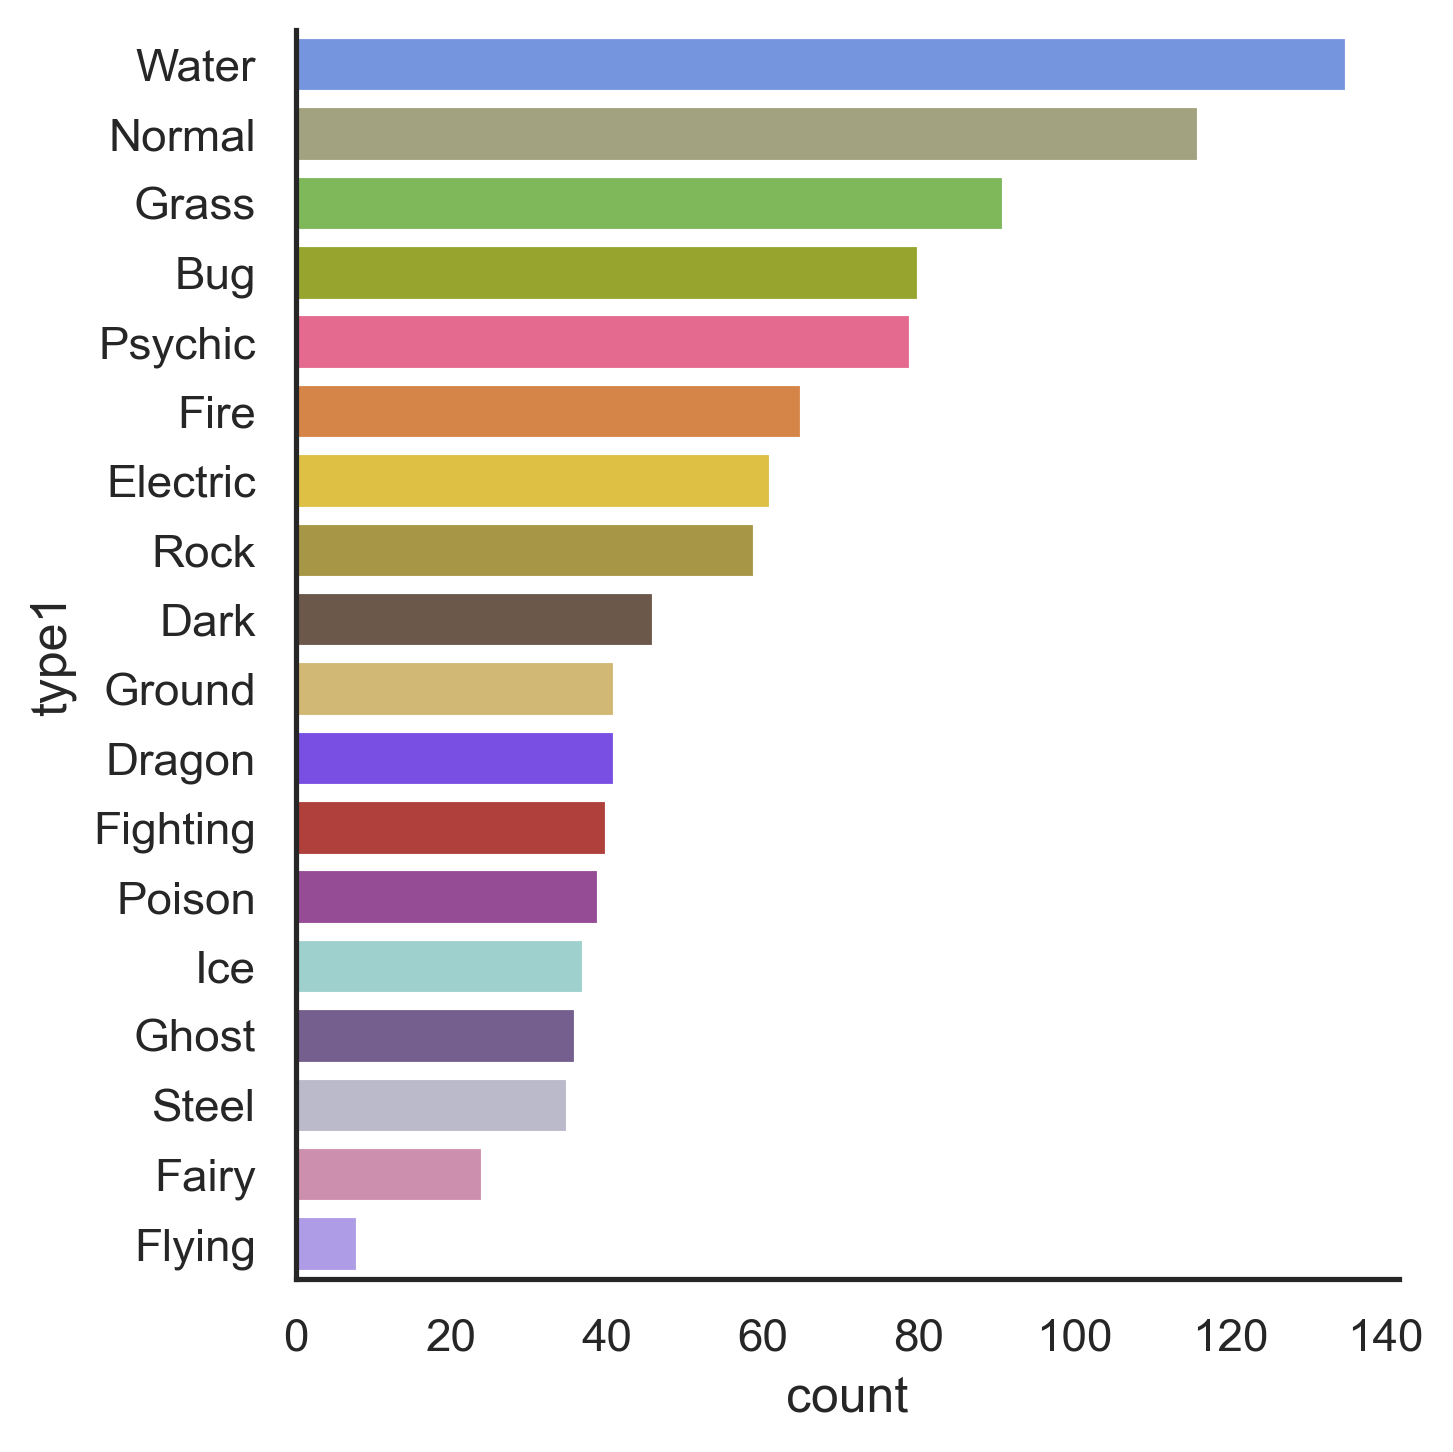

In [19]:
sns.set_style('white')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
sns.catplot(y = "type1", data = pokemon_data, orient = 'h', palette = dict_colours, kind="count", order=pokemon_data['type1'].value_counts().index)

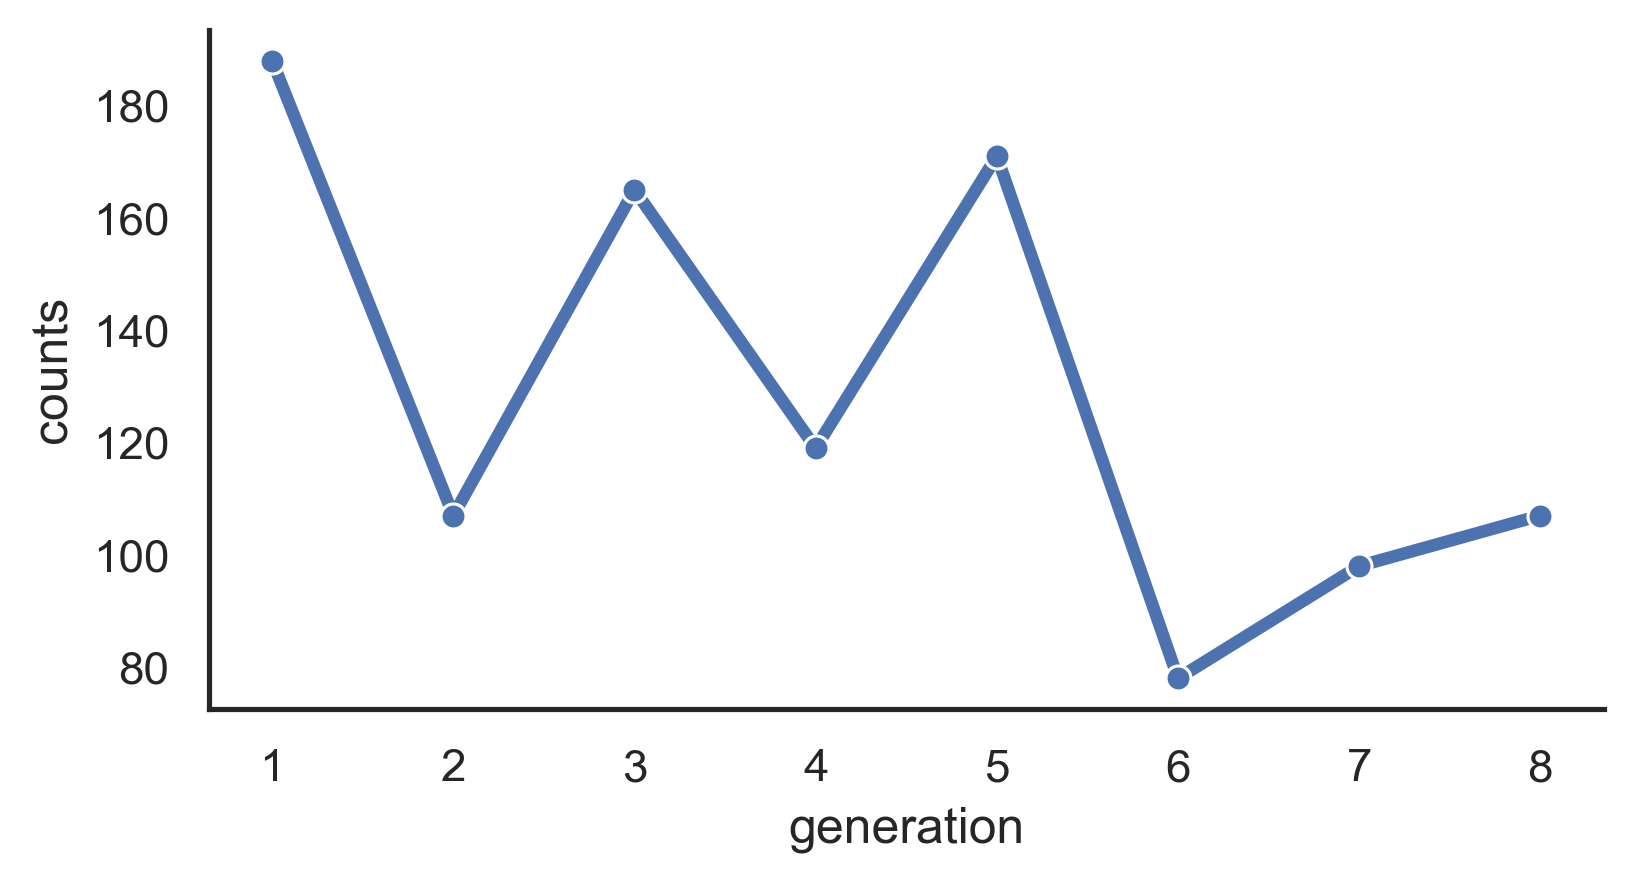

In [20]:
#ccompute the number of pokemon by generation
poke_gen = pokemon_data.groupby(['generation'])['pokedex_number'].count().reset_index(name = 'counts')

#visualize it 
sns.set_style('white')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
sns.multi = sns.lineplot(x='generation', 
                     y="counts", 
                     marker='o', 
                     linewidth=3,
                     data=poke_gen, 
                     palette='pastel')

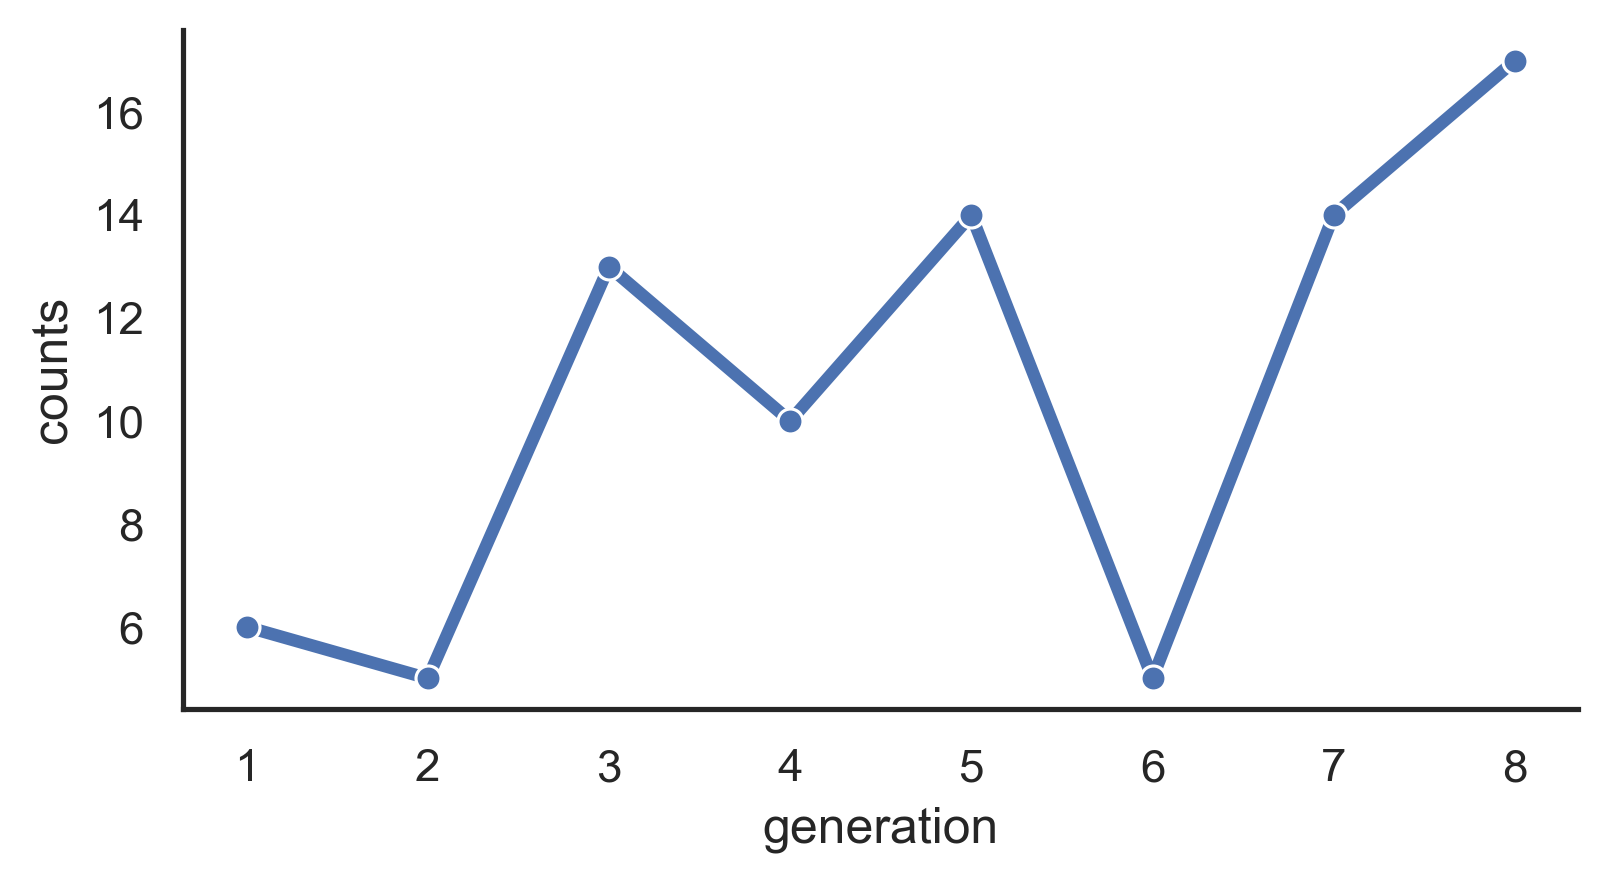

In [21]:
#compute the number of legendary pokemon by generation
poke_legend = pokemon_data.groupby(['generation'])['is_legendary'].apply(lambda x: x[x == 1].count()).reset_index(name = 'counts')

#visualize it
sns.set_style('white')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
sns.multi = sns.lineplot(x='generation', 
                     y="counts",
                     marker='o', 
                     linewidth=3,
                     data=poke_legend, 
                     palette='pastel')



correlation2 = pokemon_data[['classfication', 'type1', 'height_m', 'weight_kg', 'type1', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed']]


## Classification through KNN

## KNN


In [22]:
#change category column type to int
pokemon_data["classfication_num"] = pd.factorize(pokemon_data.classfication)[0]
pokemon_data["abilities_num"] = pd.factorize(pokemon_data.abilities)[0]

In [23]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#choosing column to use in the model

X = pokemon_data[['hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', "classfication_num", "abilities_num"]].values  #.astype(float)
y = pokemon_data['is_legendary'].values

#Nnrmalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


#split dataset in training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Pick a value for k
k = 2

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

predict = neigh.predict(X_test)


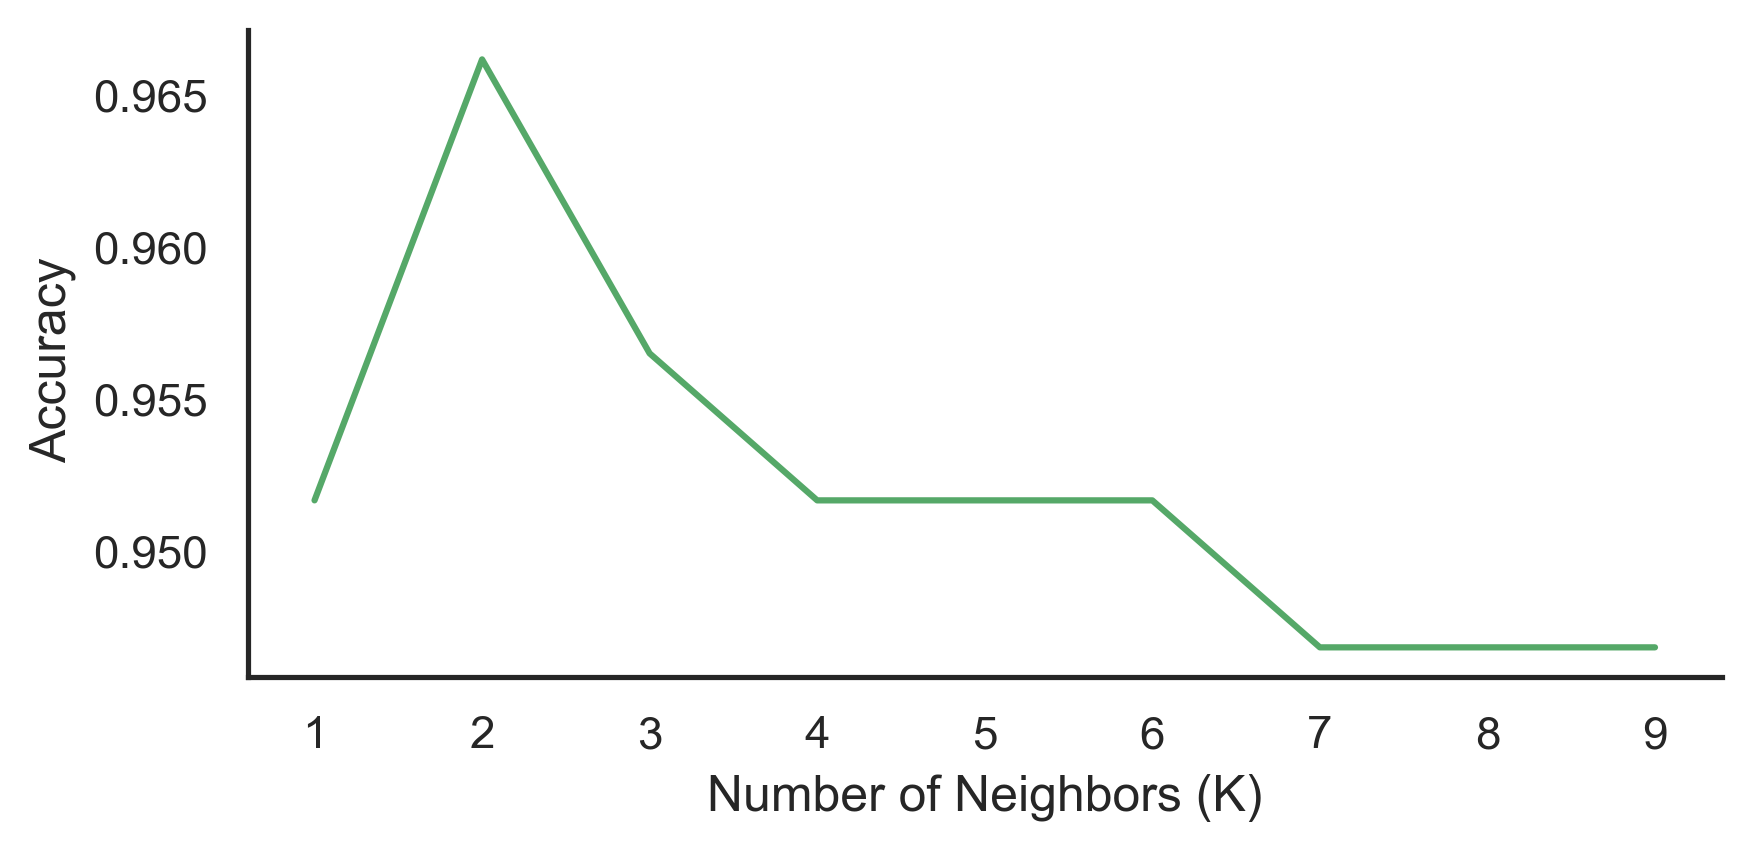

In [24]:
#calculating the accuracy of the model by KNN numbers


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


#visualize it
import matplotlib.pyplot as plt
Ks = 10

plt.plot(range(1,Ks),mean_acc,'g')


plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print(neigh.score(X_test, y_test))


0.9468599033816425


In [26]:
accuracy = pd.DataFrame(y_test, columns = ["actual_values"])
accuracy["predicted_values"] = predict

In [27]:
incorrect_prediction = accuracy.loc[~(accuracy['predicted_values'] == accuracy['actual_values'])]
correct_prediction = accuracy.loc[(accuracy['predicted_values'] == accuracy['actual_values'])]

print("How many times did the model failed to predict if the pokemon was legendary or not ? :", len(incorrect_prediction.index))
print("How many times did the model succeeded to predict if the pokemon was legendary or not ? :", len(correct_prediction.index))

How many times did the model failed to predict if the pokemon was legendary or not ? : 7
How many times did the model succeeded to predict if the pokemon was legendary or not ? : 200


## additional

In [28]:
pokemon_data.loc[(pokemon_data["is_legendary"] == 1)]

,pokedex_number,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega,classfication_num,abilities_num
178,144,Articuno,1,Freeze Pokemon,"['Pressure', 'Snow Cloak']",1.70,55.40,Ice,Flying,580,90,85,100,95,125,85,0.50,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50,0.00,1.00,1.00,1.00,1.00,4.00,2.00,1.00,3,20.56,35.00,1,0,0,93,113
179,145,Zapdos,1,Electric Pokemon,"['Pressure', 'Static']",1.60,52.60,Electric,Flying,580,90,90,85,125,90,100,0.50,1.00,1.00,1.00,1.00,0.50,1.00,0.50,1.00,0.50,0.00,2.00,1.00,1.00,1.00,2.00,0.50,1.00,3,20.56,35.00,1,0,0,78,114
180,146,Moltres,1,Flame Pokemon,"['Pressure', 'Flame Body']",2.00,60.00,Fire,Flying,580,90,100,90,125,85,90,0.25,1.00,1.00,2.00,0.50,0.50,0.50,1.00,1.00,0.25,0.00,1.00,1.00,1.00,1.00,4.00,0.50,2.00,3,20.56,35.00,1,0,0,2,115
184,150,Mewtwo,1,Genetic Pokemon,"['Pressure', 'Unnerve']",2.00,122.00,Psychic,None,680,106,110,90,154,90,130,2.00,2.00,1.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.00,1.00,3,30.84,0.00,1,0,0,94,118
185,150,Mega Mewtwo X,1,Genetic Pokemon,['Steadfast'],2.30,127.00,Psychic,Fighting,780,106,190,100,154,100,130,1.00,1.00,1.00,1.00,2.00,0.50,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.00,3,30.84,0.00,1,0,1,94,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,898,Calyrex,8,King Pokemon,['Unnerve'],1.10,7.70,Psychic,Grass,500,80,80,80,80,80,80,4.00,2.00,1.00,0.50,1.00,0.50,2.00,2.00,2.00,0.50,0.50,2.00,1.00,2.00,0.50,1.00,1.00,0.50,3,30.84,100.00,1,0,0,647,595
1022,898,Calyrex Ice Rider,8,King Pokemon,['As One'],2.40,8091.10,Psychic,Ice,680,100,165,150,85,130,50,2.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,0.50,1.00,1.00,0.50,2.00,2.00,1.00,3,30.84,100.00,1,0,0,647,596
1023,898,Calyrex Shadow Rider,8,King Pokemon,['As One'],2.40,53.60,Psychic,Ghost,680,100,85,80,165,100,150,1.00,4.00,1.00,1.00,1.00,0.00,1.00,1.00,4.00,1.00,1.00,1.00,0.00,0.50,0.50,1.00,1.00,1.00,3,30.84,100.00,1,0,0,647,596
1031,905,Enamorus Incarnate Forme,8,Love-Hate Pokemon,"['Healer', 'Contrary']",1.60,48.00,Fairy,Flying,580,74,115,70,135,80,106,0.25,0.50,0.00,2.00,1.00,0.25,1.00,1.00,1.00,0.50,0.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,0,0.00,NaN,1,0,0,653,601


In [29]:
import glob
image_list = []
for f in glob.glob(r'C:/Users/Anaïs WERNLE/Desktop/pokemon-image/*.png'): #assuming gif

    image_list.append(f)

In [30]:
len(image_list)

809

In [31]:
len(pokemon_data)

1033

In [32]:
pokemon_data["image"] = ''

pokemon_data_without_mega = pokemon_data.drop_duplicates(subset='pokedex_number', keep='first')
pokemon_data_without_mega.name.str.replace(r'(^.*Male.*$)', 'DELETE')
pokemon_data_without_mega.name.str.replace(r'(^.*Form.*$)', 'FORM')
pokemon_data_without_mega.name.str.replace(r'(^.*Forme.*$)', 'FORME')
pokemon_data_without_mega.name.str.replace(r'(^.*Style.*$)', 'STYLE')

df[df[“column” ].str.contains(“someString” )==False ]


In [33]:
pokemon_data['file'] = ""


In [34]:
pokemon_data['file'].iloc[0:809,] = image_list


C:\Users\Anaïs WERNLE\AppData\Local\Temp\ipykernel_20208\2161004980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data['file'].iloc[0:809,] = image_list


In [35]:
pd.set_option('display.max_rows', 500)

In [ ]:
pokemon_data["file"].tail(250)

In [36]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import io

In [37]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import io

pd.set_option('display.max_colwidth', -1)


def get_thumbnail(path):
    path = f"C:/Users/Anaïs WERNLE/Desktop/pokemon-image" # This "\\\\?\\" is used to prevent problems with long Windows paths
    i = Image.open(path)    
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/png;base64,">'

C:\Users\Anaïs WERNLE\AppData\Local\Temp\ipykernel_20208\182660328.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [38]:

pokemon_data['file'].iloc[0:5] = pokemon_data.pokedex_number.iloc[0:5].map(lambda pokedex_number: f"C:/Users/Anaïs WERNLE/Desktop/pokemon-image/{pokedex_number}.png")
pokemon_data['image'].iloc[0:5] = pokemon_data.file.iloc[0:5].map(lambda f: get_thumbnail(f))
pokemon_data.head(3)

C:\Users\Anaïs WERNLE\AppData\Local\Temp\ipykernel_20208\2927189267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data['file'].iloc[0:5] = pokemon_data.pokedex_number.iloc[0:5].map(lambda pokedex_number: f"C:/Users/Anaïs WERNLE/Desktop/pokemon-image/{pokedex_number}.png")


PermissionError: [Errno 13] Permission denied: 'C:/Users/Anaïs WERNLE/Desktop/pokemon-image'

In [ ]:
HTML(pokemon_data[['name', 'image']].iloc[0:809].to_html(formatters={'image': image_formatter}, escape=False))


In [ ]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [ ]:
pokemon_data.iloc[0:5].to_html(escape=False, formatters=dict(image=path_to_image_html))
HTML(pokemon_data.iloc[0:5].to_html(escape=False,formatters=dict(image=path_to_image_html)))

In [ ]:
for x in image_list:
    pokemon_data['image'].iloc[0:809,] = image_list
def to_img_tag(path):
    return '<img src="'+ path + '" width="50" >'
pokemon_data['image'].iloc[0:809,].to_html(escape=False,formatters=dict(Painting=to_img_tag)))